Exercise 1: The basics of image processing
=======================

To complete the exercise, follow the instructions and complete the missing code and write the answers where required.  All points, except the ones marked with **(N points)** are mandatory. The marked tasks are optional and require more independent work and some extra effort. Without completing them you can get at most 75 points for the exercise (the total number of points is 100 and results in grade 10). Sometimes there are more optional exercises and you do not have to complete all of them, you can get at most 100 points.

If you have not used Python, IPython and Jupyter environment before, take a look at the following list introductory tutorials:

 * [Introduction to Python 3](https://realpython.com/python-introduction/)
 * [Useful IPython facts](https://ipython.org/ipython-doc/3/interactive/tutorial.html)
 * [Introduction to Jupyter notebooks](https://www.dataquest.io/blog/jupyter-notebook-tutorial/)
 * [Introduction to NumPy, SciKit, MatPlotLib](https://cs231n.github.io/python-numpy-tutorial/)


In [2]:
# First, run this cell to download the data used in this exercise
import zipfile, urllib.request, io, os
if not os.path.isfile("token"):
    print("Downloading exercise material")
    zipfile.ZipFile(io.BytesIO(urllib.request.urlopen("https://data.vicos.si/lukacu/multimedia/exercise1.zip").read())).extractall()

Assignment 1: Image processing, histograms, filters
----------

The aim of this assignment is to familiarize yourself with the basic functionality of SciKit, NumPy and MatPlotLib, as well as the use of matrices for storing image information. In this assignment, you will try to load an image, display it and manipulate its content with NumPy operations.

 * Read image from the file `umbrellas.jpg`, and display it using functions skimage.io.imshow. The image that you have loaded consists of three channels (Red, Green, and Blue), and is represented as a 3-D matrix with dimensions height × width × channels.

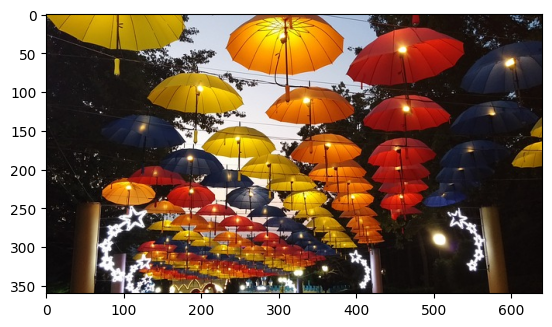

In [3]:
# Use this IPython command to enable interactive plots (without it they will be rendered only as static images)
#%matplotlib notebook

# We will be using SciKit-Image library for image IO and image processing and MatPlotLib 
# for visualization in the notebook.
from skimage import data, io
from matplotlib import pyplot as plt

image = io.imread("umbrellas.jpg") # Load the image
plt.imshow(image) # Draw the image
plt.show() # Display the image

 * You can query the dimensions of the matrix using the property `shape`. Observe that a color image has three layers (third dimension), while a grayscale image has only one layer and is also missing the third dimension. Also check the dtype of the matrix, by default images are presented using uint8 type (unsigned integers in range 0 to 255).

In [4]:
print(image.shape)
gray = io.imread("phone.jpg")
print(gray.shape)
print(image.dtype)

(360, 640, 3)
(384, 510)
uint8


 * Convert the color image into a grayscale one by averaging all three channels. Be careful when visualizing single channel images as they are not always visualized as grayscale. It is important to correctly set the colormap of the plot.

float64


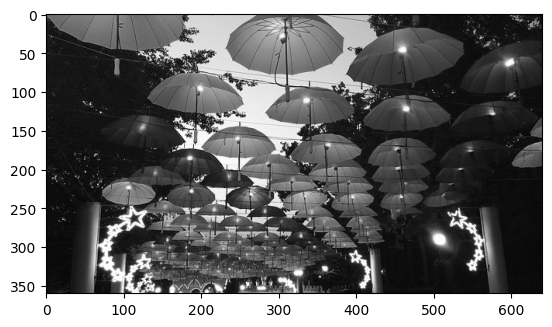

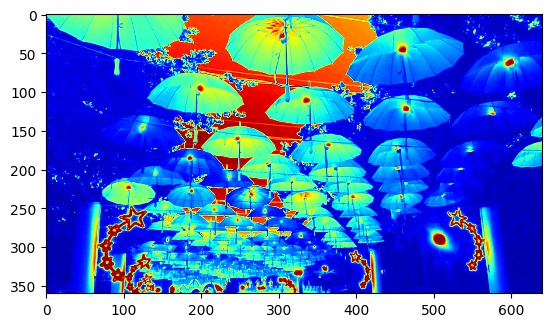

In [5]:
# We will be using numpy library for low-level matrix operations.
import numpy as np

gray = np.mean(image, 2) # Function numpy.mean converts image to float64
print(gray.dtype) # Display the data type of matrix

plt.figure()
plt.imshow(gray.astype(np.uint8), cmap = plt.cm.gray) # If we want to display image correctly we have to cast it to uint8 again.
plt.show()

plt.figure()
plt.imshow(gray.astype(np.uint8), cmap = plt.cm.jet) # Change colormap to interpret values differently.
plt.show()

 * Cut out a rectangular sub-image, and display it as a new image. Mark the same region in the original image by setting its third (the blue) color channel to 0, and display the modified image.

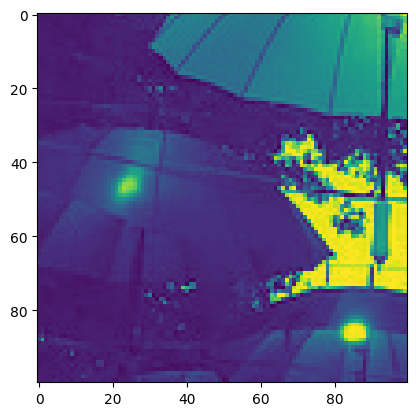

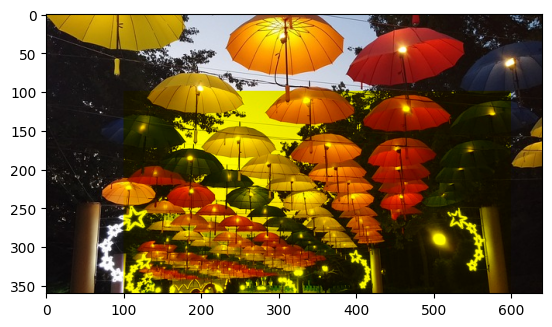

In [6]:
cutout = image[100:200, 100:200, 1]


plt.imshow(cutout)
plt.show()

# TODO: set a part of the image to 0 using range-indexing notation.

image[100:600, 100:600, 2] = 0
plt.imshow(image)
plt.show()




 * Display a grayscale image that has the selected region negated (its values are inverted).

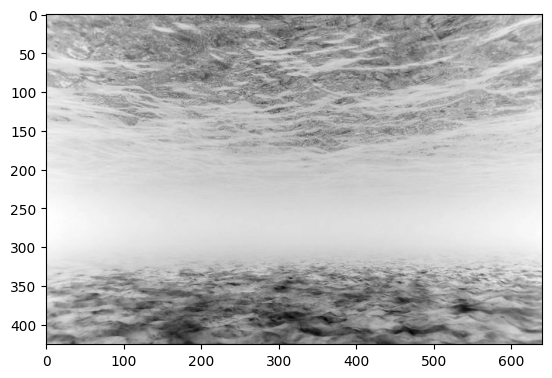

In [7]:
# TODO: use the same region as before. You can use matrix-scalar operations to achieve negation (255 - A).
grayscale = io.imread("underwater.jpg")
grayscale = np.mean(grayscale, 2)

inverted = 255 - grayscale

plt.imshow(inverted.astype(np.uint8), cmap = plt.cm.gray)
plt.show()
#print(grayscale)

 * Compute and display a thresholded binary image. Thresholding is an image operation that produces a binary image (mask) of the same size as the source image; its values are 1 (true) and 0 (false), depending on whether the corresponding pixels in the source image have values greater or lower than the specified threshold. Use a threshold of 150, and display the resulting image. Experiment with different thresholds and write down your observations.

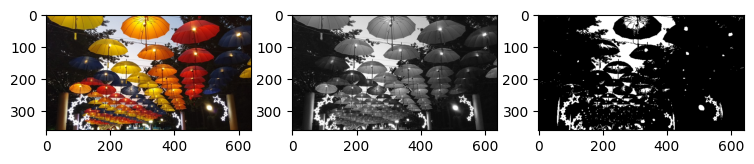

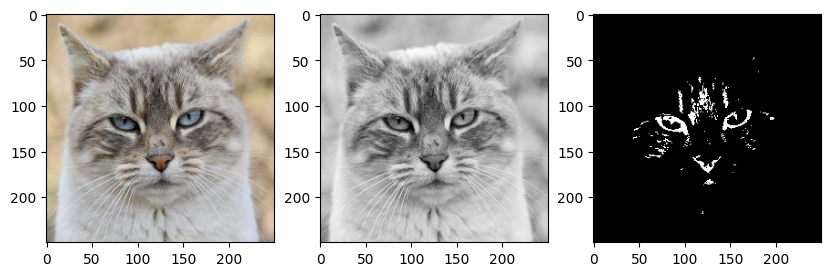

In [8]:
import numpy as np

image = io.imread("umbrellas.jpg")

gray = np.mean(image, 2)

_, ax = plt.subplots(1, 3, figsize=(9, 4)) # Divide plot into a grid of axes, use each handle to draw on subplot

ax[0].imshow(image)
ax[1].imshow(gray, cmap=plt.cm.gray)

thresholded = gray > 150 
ax[2].imshow(thresholded, cmap=plt.cm.gray)

plt.show() # Display the image 

_, ax = plt.subplots(1, 3, figsize=(10, 10))
image2 = io.imread("cat.jpg")
ax[0].imshow(image2)

gray2 = np.mean(image2, 2)
ax[1].imshow(gray2.astype(np.uint8), cmap=plt.cm.gray)

thresholded2 = gray2 < 70
ax[2].imshow(thresholded2, cmap=plt.cm.gray)
plt.show()

Now we will take a look at the construction of histograms. Histograms are a very useful tool in image analysis; as we will be using them extensively in the later exercises, it is recommended that you pay extra attention to how they are built. In this assignment, we will focus on the construction of histograms for single-channel (grayscale) images. We will use function `skimage.exposure.histogram` which has some useful modes. Check the documentation for arguments `nbins`, `source_range` and `normalize` and write down their function. What is the meaning of variables returned by the function?

The second part of the assignment expects you to try out several image filtering approaches, this is another useful basic technique that is used frequenlty in our next assignments.

In [9]:
from skimage.exposure import histogram

image = np.mean(io.imread("umbrellas.jpg"), 2).astype(np.uint8)
hvalues, hbins = histogram(image, nbins=256, source_range='dtype', normalize=False)

print(hvalues)
print(hbins)

[  14   70   96   92  106  138  185  288  452 1163 2685 4013 5503 5659
 5157 4868 4870 4878 4764 5087 5312 4954 4476 3750 3185 2787 2472 2146
 1996 1894 1885 1705 1649 1635 1536 1609 1625 1470 1448 1370 1241 1229
 1221 1100 1082 1038 1025  987 1014 1027 1033  992 1028 1036 1104 1168
 1163 1173 1242 1304 1277 1219 1226 1143 1169 1176 1203 1221 1184 1160
 1109 1097 1085 1054 1041 1105 1011 1035 1010 1089 1015 1013  987  944
  960  991  941 1016  948  896  849  882  838  889  835  838  918  815
  886  840  924  896  970  951  965 1058 1128 1141 1094 1154 1123 1090
 1084 1031 1022  994  992  962  958  879  839  754  853  837  765  740
  796  744  756  716  735  674  689  643  611  614  569  546  504  522
  488  493  407  400  375  365  389  363  331  308  295  269  270  282
  297  275  285  237  238  253  209  220  251  197  211  203  192  183
  167  163  169  145  174  143  155  144  162  136  155  153  127  141
  115  128  126  145  161  148  138  161  186  227  228  239  294  330
  476 

 * Compute histogram for more at least two images and visualize the resulting histograms using `matplotlib.pyplot.bar`.

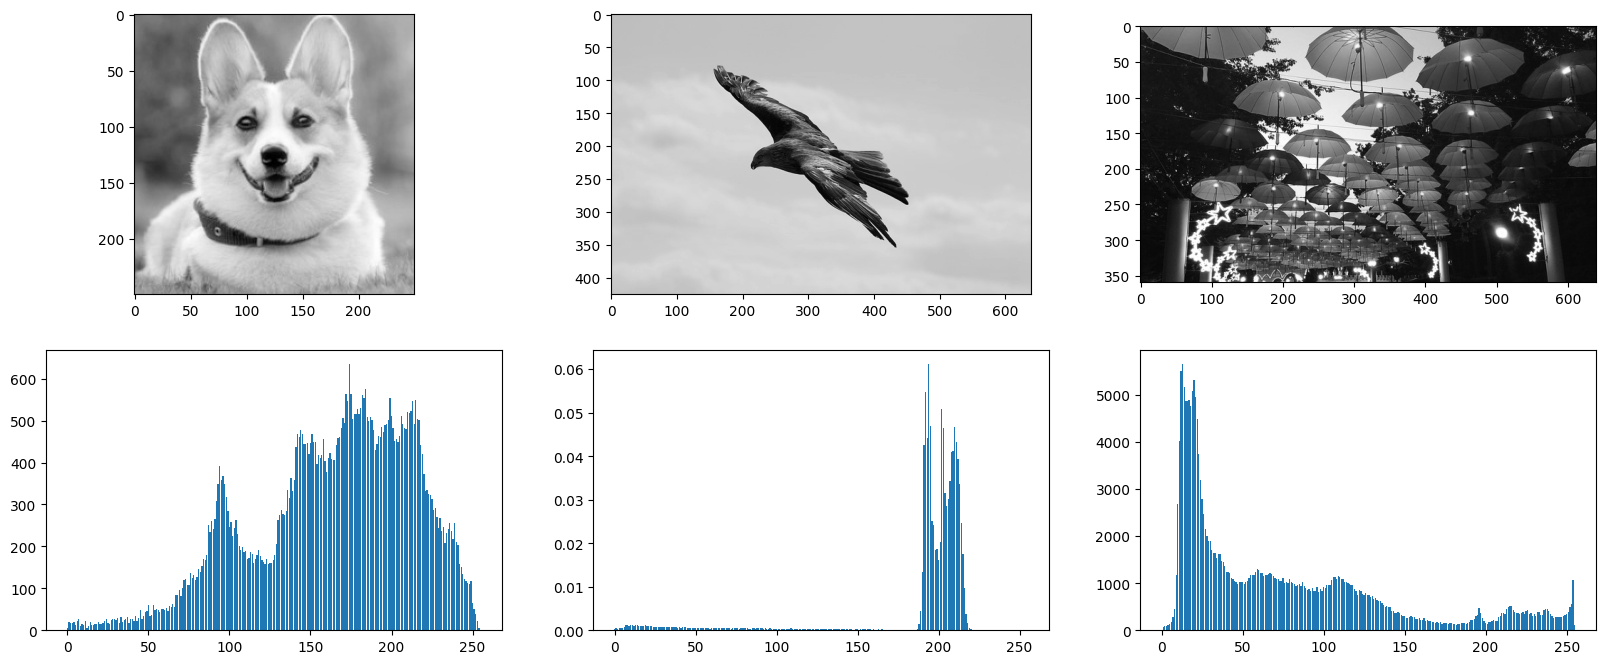

In [10]:
_, ax = plt.subplots(2, 3, figsize=(20, 8))

ax[0][2].imshow(image, cmap = plt.cm.gray)
ax[1][2].bar(hbins, hvalues) # Use this function to draw a bar graph


# TODO: add at least two more images and their histograms to the left of the figure.
image1 = io.imread("dog.jpg")
image2 = io.imread("eagle.jpg")

gray1 = np.mean(image1, 2).astype(np.uint8)
gray2 = np.mean(image2, 2).astype(np.uint8)

hvalues1, hbins1 = histogram(gray1, nbins=256, source_range='dtype', normalize=False)
hvalues2, hbins2 = histogram(gray2, nbins=256, source_range='dtype', normalize=True)

ax[0][0].imshow(gray1.astype(np.uint8), cmap = plt.cm.gray)
ax[0][1].imshow(gray2.astype(np.uint8), cmap = plt.cm.gray)
ax[1][0].bar(hbins1, hvalues1)
ax[1][1].bar(hbins2, hvalues2)
plt.show()

 * Compare the images above by looking at their histograms, describe what would happen if the images would be flipped on their head, how would the histograms change? Motivate your answer!

 * For this task, you will implement a simple image operation called *histogram stretching*. Using the pseudo-code provided below, implement the function `histstretch`, which performs the histogram stretching on the input grayscale image. For the outline of the algorithm, consult the slides from the lectures. As we are performing the same operation (with the same factors) on all image elements, the operation can be sped-up via use of matrix operations, which perform the operation on the whole image at once. Do not use any existing function to simplify your work, this assignment should test your NumPy skills a bit.
 
   Hints: The maximum and the minimum grayscale value in the input image, can be determined using functions `np.max` and `np.min`.
   
   Test the function by writing a script that reads an image from file `phone.jpg` (note that it is already a grayscale image), compute the histogram with 256 bins, and displays it. As you can observe from the histogram, the lowest grayscale value in the image is not 0, and the highest value is not 255. Perform the histogram stretching operation and visualize the results (display the image and plot its 256-bin histogram). Note that `imshow` does automatic stretching when displaying an image, to prevent it and really show the difference between input and output image, use arguments `vmin=0, vmax=255`.

<BarContainer object of 256 artists>

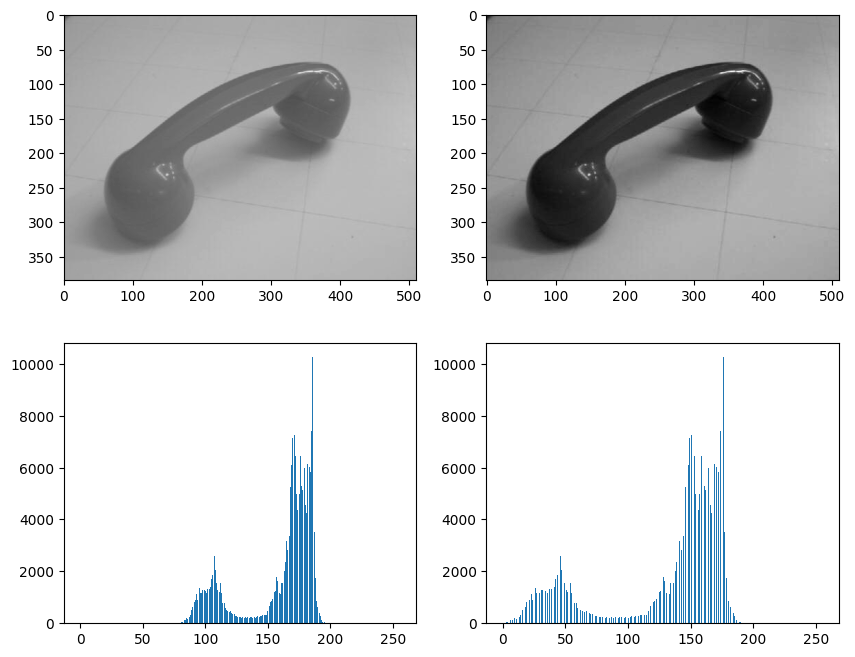

In [11]:
def histstretch(image):
    # 1. determine the minimum and maximum value of I
    # 2. the minimum and maximum of the output image S are known
    # 3. use the stretch formula to compute new value for each pixel
    # f(a) = amin + (a - alow) * ((amax - amin)/(ahigh - alow))
    # TODO: write your code here
    ahigh = np.max(image)
    alow = np.min(image)
    amin = 0
    amax = 255

    newimage = amin + (image - alow) * ((amax - amin)/(ahigh - alow))
    return newimage
 

_, ax = plt.subplots(2, 2, figsize=(10, 8))
phone = io.imread("phone.jpg")
ax[0][0].imshow(phone, cmap = plt.cm.gray, vmin=0, vmax=255)
hvalues3, hbins3 = histogram(phone, nbins=256, source_range='dtype', normalize=False)
stretched = histstretch(phone)
ax[0][1].imshow(stretched, cmap = plt.cm.gray, vmin=0, vmax=255)
hvalues4, hbins4 = histogram(stretched.astype(np.uint8), nbins=256, source_range='dtype', normalize=False)
ax[1][0].bar(hbins3, hvalues3)
ax[1][1].bar(hbins4, hvalues4)



 * **(5 points)** How would you use the different color spaces to perform the histogram stretching operation to improve the contrast, but without distorting the colors? Find a color image with weak contrast and write a script that demonstrates your solution on it. Use existing hisotgram equalization in `skimage.exposure.equalize_hist` to improve single-channel image, but note that the function only works correctly on grayscale images, so an extra step is required to achieve correct adjustment. Use the `flowers.jpg` image for testing.
 
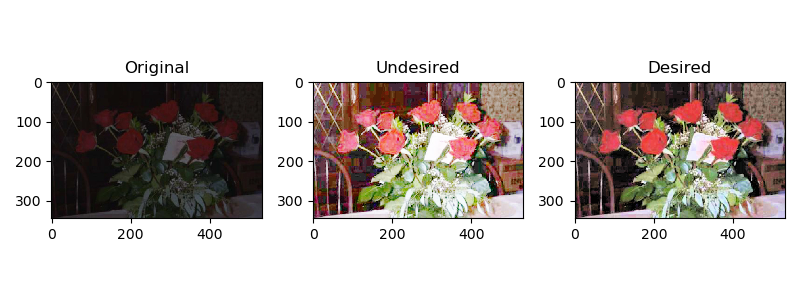

In [12]:
# TODO

 * Now lets look at linear filtering operations. We will not implement them, instead we will simply test the effects of some common operations on images. Write a script that loads images `umbrellas.jpg` and `eagle.jpg`, converts them to grayscale and filters them using Gaussian filter, Sobel filter, and Median filter. You can find implementations of all three filters in the `skimage.filters` module. Visualize the results for default parameter values. Which of the three are linear filters? What effect does `sigma` parameter have for Gaussian filter? Note: read the documentation for the functions that you are using. For filters, pay attention to `preserve_range` parameter and what it does.

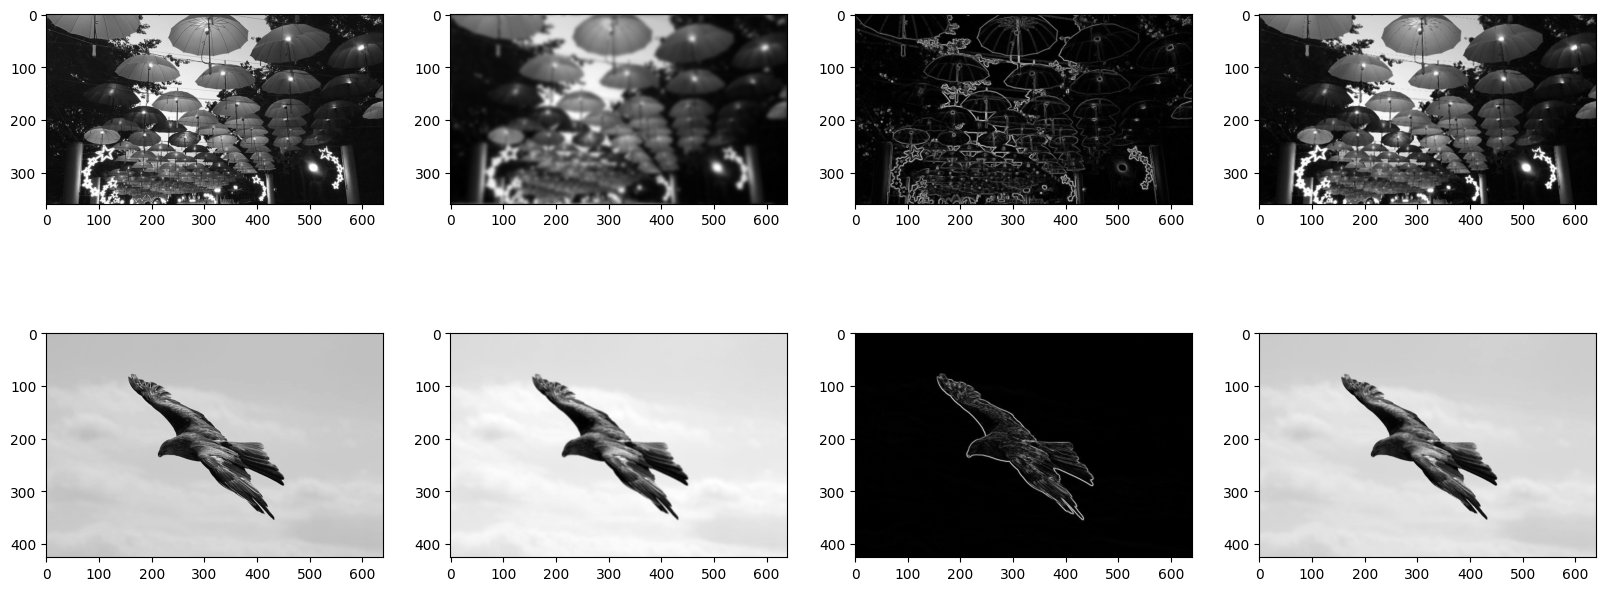

In [13]:
import skimage.filters as filt

umbrellas = np.mean(io.imread("umbrellas.jpg"), 2).astype(np.uint8)
eagle = np.mean(io.imread("eagle.jpg"), 2).astype(np.uint8)

_, ax = plt.subplots(2, 4, figsize=(20, 8))

ax[0][0].imshow(umbrellas, cmap=plt.cm.gray)
ax[1][0].imshow(eagle, cmap=plt.cm.gray)

ax[0][1].imshow(filt.gaussian(umbrellas, preserve_range=True, sigma=3, mode='wrap'), cmap=plt.cm.gray)
ax[0][2].imshow(filt.sobel(umbrellas), cmap=plt.cm.gray)
ax[0][3].imshow(filt.median(umbrellas), cmap=plt.cm.gray)

ax[1][1].imshow(filt.gaussian(eagle), cmap=plt.cm.gray)
ax[1][2].imshow(filt.sobel(eagle), cmap=plt.cm.gray)
ax[1][3].imshow(filt.median(eagle), cmap=plt.cm.gray)


 * **(5 points)** Implement image sharpening as a combination of blurring and pixel-wise operations as it was described at the lectures. How can you control the impact of the sharpening on the input image? To complete the task you have to understand the underlying principle, not just show the implementation.

In [14]:
# TODO


Assignment 2: Geometric transformations
-----
    
A homography is a bijective transformation between two projection spaces, in our case planes; the first plane is the source image plane, while the second plane is defined by input points that denote an area in which we wish to embed the source image. A homography  s described by a matrix; in case of transformation between two planes, it has dimension
3 × 3.

 * Write a script in which you read and display the image from file `monitor.jpg`, and determine a polygon of four points. It is recommended that you pick the four points that correspond to the corners of the monitor in the image. Determine a suitable order of points (for example, begin at top-right corner and continue in counter-clockwise direction). Afterwards, display a polygon that is defined by the selected points (e.g. set the pixels within the polygon to white as shown in the example below). 

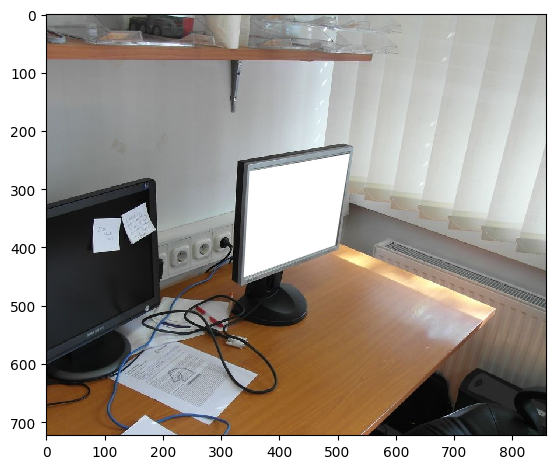

In [15]:
image = io.imread("monitor.jpg")

p2 = [(340, 450), (350, 270), (520, 240), (495, 395)] # Change destination point coordinates here
fig = plt.figure()
io.imshow(image)
xs, ys = zip(*p2) # Convert points to vertices of x and y coordinates (handy function in Python)
plt.fill(xs, ys, color='w', fill=True)
plt.show()
text = fig.text(0,0, "", va="bottom", ha="left")

def onclick(event):
    tx = 'x=%d, y=%d' % (int(event.xdata), int(event.ydata))
    text.set_text(tx)

# Create an hard reference to the callback not to be cleared by the garbage collector
ka = fig.canvas.mpl_connect('button_press_event', onclick)

 * Create a script that reads an image and uses the its dimensions and the selected points to compute the homography, using the function estimate_homography. This function returns the homography matrix H, which can be used to transform pixel-coordinates from the source image plane using the following formula:
\begin{equation}
p^\prime_b = \mathbf{H}_{ab}p_a \,
\end{equation}
with the following individual parts of the equation:
\begin{equation}
p_a = \begin{bmatrix} x_a\\y_a\\1\end{bmatrix}, p^\prime_b = \begin{bmatrix} w^{\prime}x_b\\w^{\prime}y_{b}\\w^{\prime}\end{bmatrix}, \mathbf{H}_{ab} = \begin{bmatrix} h_{11}&h_{12}&h_{13}\\h_{21}&h_{22}&h_{23}\\h_{31}&h_{32}&h_{33} \end{bmatrix}.
\end{equation}

In [16]:
def estimate_homography(p1, p2):
    A = np.zeros((8,9))
    # Homography matrix
    for i in range(4): # Using the corners
            A[i*2,:] = [ p1[i][0], p1[i][1], 1, 0, 0, 0, -p2[i][0]*p1[i][0], -p2[i][0]*p1[i][1], -p2[i][0] ]
            A[i*2+1,:] = [0, 0, 0, p1[i][0], p1[i][1], 1, -p2[i][1]*p1[i][0], -p2[i][1]*p1[i][1], -p2[i][1] ]

    [U,S,V] = np.linalg.svd(A)
    return np.reshape(V[-1,:],(3,3))

p1 = [(0, 0), (100, 0), (100, 100), (0, 100)] # Some dummy source points

H = estimate_homography(p1, p2)

print(H)

[[-5.37788764e-04  4.35944801e-03  6.02822074e-01]
 [-3.74305135e-03  3.10622358e-04  7.97852745e-01]
 [-2.04311250e-06  3.25512839e-06  1.77300610e-03]]


 * As can be seen from equations above, the resulting point $p^\prime_b$ is in homogenous form, i.e. before we can use its coordinates, they need to be divided by $w^{\prime}$. Homography equation allows you to transform the coordinates of each pixel from the original image to its destination coordinates in the target image. Replace the pixels in the target image with the corresponding pixels from your source image.
 
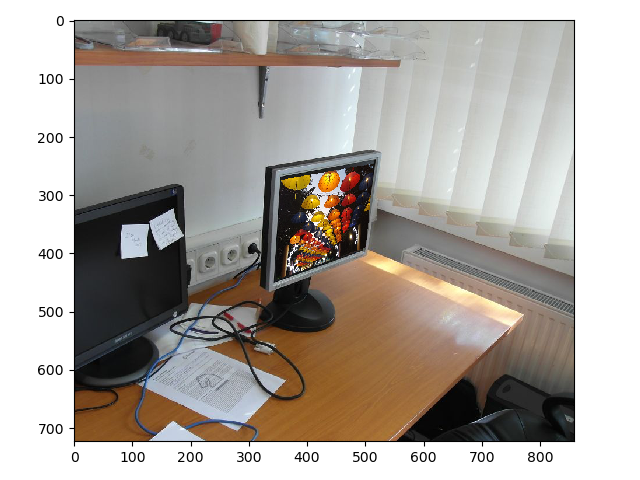


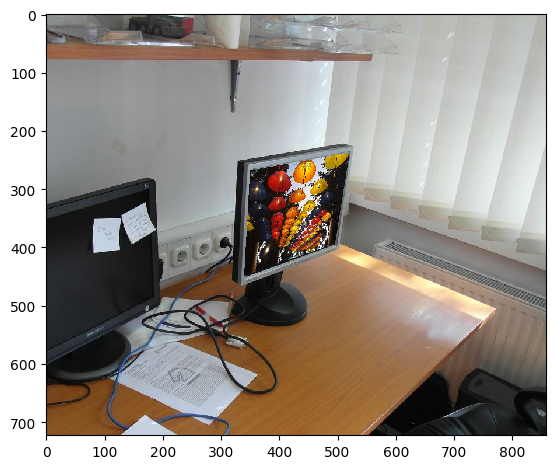

In [17]:
destination = io.imread("monitor.jpg")
source = io.imread("umbrellas.jpg")

p1 = [(0, 0), (0, source.shape[0]), (source.shape[1], source.shape[0]), (source.shape[1], 0)]
p2 = [(520, 240), (495, 395), (340, 450), (350, 270)]


# * Iterate over the source image and map every source pixel to destination one:
#   * Generate its homogeneous coordinate and project it using matrix H
#   * Obtain coordinates in the destination image by normalizing x an y with w and rounding
#   * Copy values from source to destination (be careful about the out-of-image coordinates)
# * Display the resulting image


def imagemap(p1, p2, source, destination):
    H = estimate_homography(p1, p2)
    for y in range(0, len(source)):
        for x in range(0, len(source[0])):
            pa = [x,y,1]
            pb = np.dot(H, pa)
            pb /= pb[2]
            pb = pb.astype(int)
            destination[pb[1],pb[0]] = source[y][x]
    
imagemap(p1, p2, source, destination)
io.imshow(destination)
plt.show()


 * **(5 points)** What is the problem with the pixel mapping approach that we have used in the previous task? Write a better pixel mapping that you have discussed at the lectures that will not have the same problems. Test the base and improved approaches by using the following reference points: `p2 = [(50, 50), (400, 50), (600, 600), (40, 400)]`. Note that increasing the resolution of the source image before projection is not a valid solution.
 
 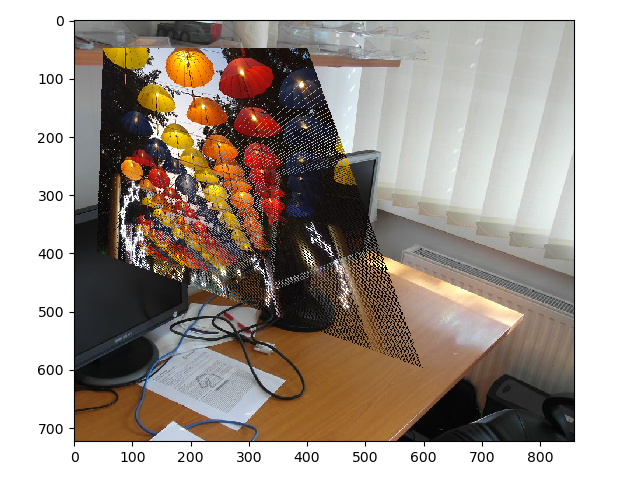

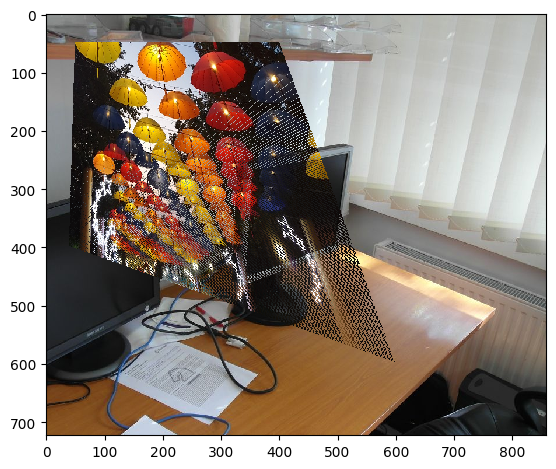

In [18]:
# TODO
p1 = [(0, 0), (0, source.shape[0]), (source.shape[1], source.shape[0]), (source.shape[1], 0)]
p2 = [(50, 50), (40, 400), (600, 600), (400, 50)]

destination = io.imread("monitor.jpg")
source = io.imread("umbrellas.jpg")

imagemap(p1, p2, source, destination)

io.imshow(destination)
plt.show()


 * **(5 points)** You have probably implemented mapping as a double for-loop in Python. To practice matrix operations, try implementing the entire process (forward or backward projection) without explicit for-loops.

In [19]:
# TODO

Assignment 3: Blending images
----

Another useful image manipulation technique is image blending. The simplest way to do blending is by combining the two images based on the information from the mask, use the color information from the background image if the mask is `0` and color information from foreground image if the mask is `1`. An extension of this technique uses mask values as weights when summing up two images, in this case the mask is used as the alpha (transparency) mask of the foreground that is blended upon the background image. 

* Implement a function `blend_alpha` that receives two color images and a mask and combines them using equation:

  \begin{equation}
  \mathbf{M}_i = \alpha_i \mathbf{F}_i + (1 - \alpha_i) \mathbf{B}_i,
  \end{equation}

  You can assume that the mask and both images are of the same size. Remember to convert the image data to floating point data type for the calculation and then back to uint8. Test the function by loading image from `eagle.jpg` as foreground image, image from file `underwater.jpg` as background image and mask from file `eagle_mask.png` and visualizes the result. 
  
  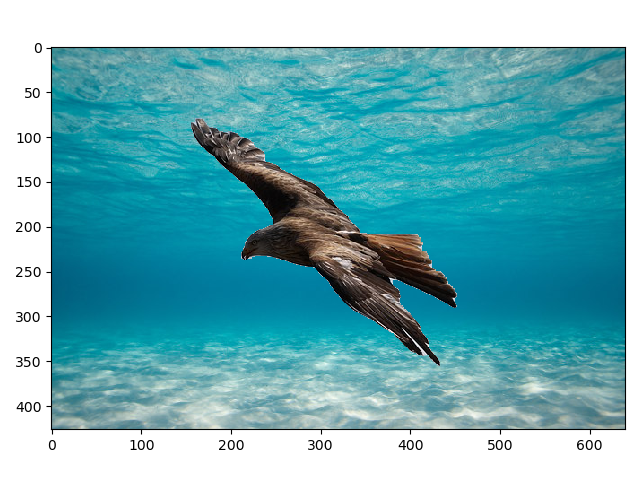

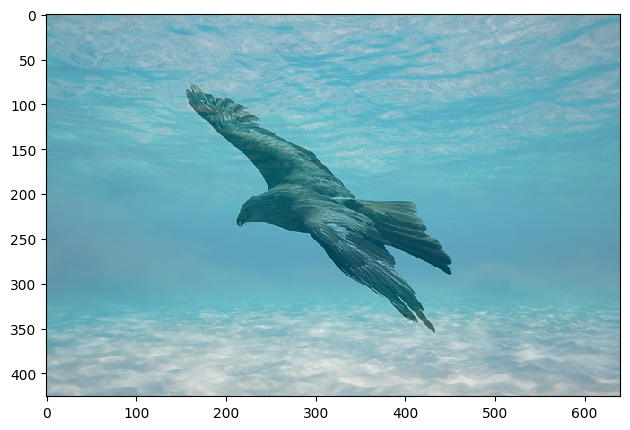

In [20]:
def blend_alpha(F, B, alpha):
    # TODO: write a simple blending function
    M = []
    for y in range(0, len(F)):
        My = []
        for x in range(0, len(F[0])):
            My.append(((alpha * F[y][x]) + ((1-alpha) * B[y][x])))
        M.append(My)
    return np.array(M)
# TODO: write a testing script
eagle = io.imread("eagle.jpg")
underwater = io.imread("underwater.jpg")

blend = blend_alpha(eagle, underwater, 0.5)

io.imshow(blend.astype(np.uint8))
plt.show()

 * As you have heard at the lectures, a more realistic merging can be obtained by taking care of individual frequency bands using a Laplace pyramid. This approach automatically blends higher frequencies in the image with a more precise mask and lower frequencies with a more smoothed mask. For this task you have to first implement function `gaussian_pyramid` to compute an increasingly more blurred image and then proceed to `laplacian_pyramid` that computes the Laplacian pyramid as is explained in the lecture slides. Again, be careful regarding data types, also remember that floating point operations introduce errors so it is a good practice to clip values to a valid interval using `np.clip`. You can use function `skimage.filters.gaussian` to calculate images filtered with a Gaussian (you have to set parameter `preserve_range` to `True`). Test the correctness by visualizing the layers of the pyramid. Experiment with sigma parameter for Gaussian kernel as well as the number of pyramid levels.

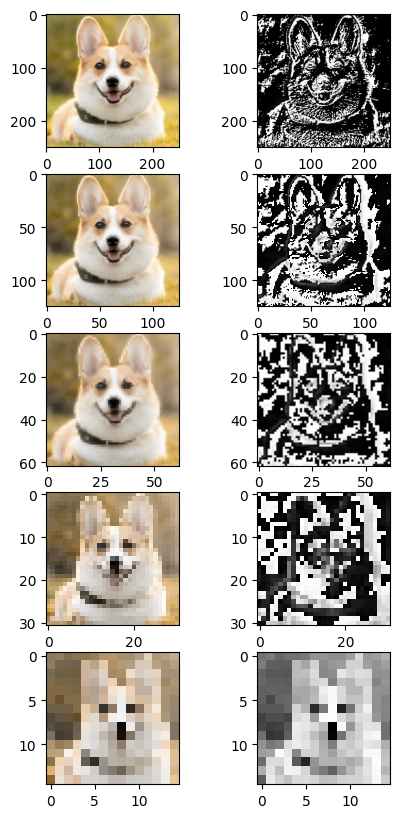

In [41]:
import numpy as np
from skimage import filters, transform
import math

def gaussian_pyramid(I, levels):
    # TODO: write function that generates Gaussian pyramid for a given image
    Pyramids = {}
    Ip = I
    mult = 1
    for level in range(1, levels + 1):
        Il = filters.gaussian(Ip, preserve_range=True, sigma=0.5)
        Pyramid = []
        for y in range(0, (int) (len(I)/mult)):
            Pyramidy = []
            for x in range(0, (int)(len(I[0])/mult)):
                Pyramidy.append(Il[y * mult][x * mult])
            Pyramid.append(Pyramidy)
        Pyramids[level - 1] = np.array(Pyramid)
        Ip = Il
        mult *= 2
    return Pyramids

def laplacian_pyramid(I, levels):
    # TODO: write function that generates Laplacian pyramid for a given image
    Gaussian = gaussian_pyramid(I, levels + 1)
    Pyramids = {}
    for level in range(0, levels):
        Ilevel = Gaussian[level]
        if(level != levels - 1):
            Ilevel1 = Gaussian[level + 1]
            Ilevel1 = transform.resize(Ilevel1, (len(Ilevel), len(Ilevel[0])))
            Pyramids[level] = Ilevel - Ilevel1
        else:
            Pyramids[level] = Ilevel
    return Pyramids



_, ax = plt.subplots(5, 2, figsize=(5, 10))
source = io.imread("dog.jpg")
Pyramids = gaussian_pyramid(source, 5)

ax[0][0].imshow(Pyramids[0].astype(np.uint8))
ax[1][0].imshow(Pyramids[1].astype(np.uint8))
ax[2][0].imshow(Pyramids[2].astype(np.uint8))
ax[3][0].imshow(Pyramids[3].astype(np.uint8))
ax[4][0].imshow(Pyramids[4].astype(np.uint8))

LapPyramids = laplacian_pyramid(source, 5)

ax[0][1].imshow(np.mean(LapPyramids[0], 2).astype(np.uint8), cmap = plt.cm.gray)
ax[1][1].imshow(np.mean(LapPyramids[1], 2).astype(np.uint8), cmap = plt.cm.gray)
ax[2][1].imshow(np.mean(LapPyramids[2], 2).astype(np.uint8), cmap = plt.cm.gray)
ax[3][1].imshow(np.mean(LapPyramids[3], 2).astype(np.uint8), cmap = plt.cm.gray)
ax[4][1].imshow(np.mean(LapPyramids[4], 2).astype(np.uint8), cmap = plt.cm.gray)
plt.show()

  * Implement a function `blend_laplace` that performs merging using frequency separation. If operating on color images you will have to do this for every channel separately and combine the result. Write a script that tests the function using the same input as before and visualizes the result. Besides image pairs from the previous tasks also test the method on the pair of images `autumn1.jpg` and `autumn2.jpg` together with mask from `autumn_mask.png` and compare how the images are stitched together using Laplace blending in comparison to regular smoothed mask. 

    Finally test also on pair of images `eye.jpg` and `hand.jpg` together with mask from `eye_mask.png`. A reference for the last pair is the image below.
  
    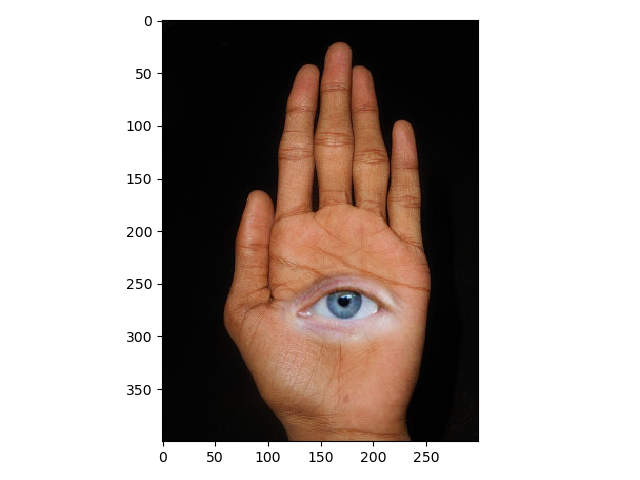

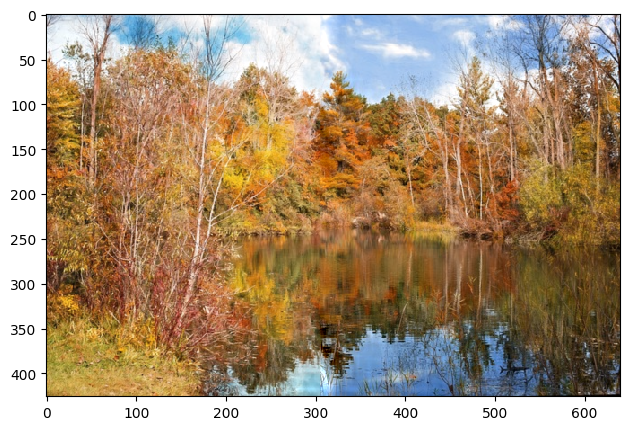

In [45]:
def blend_laplace(F, B, alpha, levels):
    # 1. Compute the Laplace pyramids for background and foreground images.
    # 2. Compute the Gaussian pyramid for the mask.
    # 3. Combine corresponding layers of all three pyramids using weighted averaging (as done in the previous task).
    # 4. Calculate the resulting image by flattening the resulting pyramid (summing up the layers together into a single image).
    # TODO
    Lf = laplacian_pyramid(F, levels)
    Lb = laplacian_pyramid(B, levels)

    Gm = gaussian_pyramid(alpha, levels)

    Ls = {}
    for level in range(0, levels):
        Gm[level] = Gm[level] / 255
        Ls[level] = Gm[level] * Lf[level] + (1 - Gm[level]) * Lb[level]

    #0 --- 200
    #0 --- 100
    #200 / 100 = 2 -> 0,20,40,60

    Ret = Ls[0]
    for level in range(1, levels):
        Ret += transform.resize(Ls[level],(len(Ret),len(Ret[0])))
    Ret = np.clip(Ret, 0, 255)

    return Ret



# TODO: use the function
A = io.imread("autumn1.jpg")
B = io.imread("autumn2.jpg")
M = io.imread("autumn_mask.png")
Pyramids = blend_laplace(A, B, M, 5)

io.imshow(Pyramids.astype(np.uint8))
plt.show()

 * **(10 points)** Use image blending for panorama stitching. In this task you will combine a lot of concepts that you have tested in the rest of the exercise. You will be using `panorama1.jpg` and `panorama2.jpg` images from the supplementary material, but you can also use custom images if you want. 

   Panoramas are usually combined from multiple images using automatic techniques, but for our work you will have to manually select four points in each image. These feature points should be present in both images and will form the basis for the computation of the homography matrix. Be careful about the ordering of the points. Then use the `estimate_homography` function from Assignment 2 to calculate homography. Using your `wrap` function transform one image to the other's coordinate system and blend them together using the Laplace blending. Make sure that the canvas of both images is sufficently large to contain the entire panorama. The initial mask can be created by blending two images with a linear gradient mask.

   Visualize the result and write a short description of the process and the results. What are the limitations of your approach?

In [ ]:
# TODO